<a href="https://colab.research.google.com/github/Spookytober/Datascience/blob/main/AO_Unit8ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 8 Exercises: The Art of BART

These exercises are grouped into two parts:

- Questions on the nature of decision trees, random forests, and BART models
- An oppurtunity to practice implementing and analyzing a BART model.

Enjoy!

## Bartian Theory

**Task1**:

Draw a decision tree--on a physical piece of paper--that predicts how many calories you burn in a day, using time you spent exercising that day (in minutes) as a predictor.

To help you understand what you're doing with this tree, seperately create an x/y plot with time exercising as x, and calories burned as y.

If this seems to easy, then add another variable or two (type of exercise?), and/or increase the depth of your tree.

You do not have to show me or turn in your tree to earn credit for this question, although I would like to see your drawing.

**Task2**:

What is a decision tree? How do they work?

A decision tree is a type of graph that is meant to easily visualize a predicted by using "parent nodes" that have "children" that feature the predicted at that stage in the tree. They work by starting with, to use the previous task as an example, something simple like ">20 minutes of running." If you were to create a binary decision tree, there would be lines correlating to true or false coming off that node. Whether or not it was true or false dictates how many calories were burned. If it was true, you need more data, so you can ask if there were more than, say, 40 minutes of running. You can keep repeating this to any degree (depth), and the calories burned show the predicted for that amount of exercise. They act like those flow chart quizzes you'll see in magazines sometimes that tell you what book to read.

**Task3**:

What does the "depth" of a decision tree mean?

How do I know if a tree is too deep, or not deep enough?

Depth is the variable that tells you how many "branches" your decision tree will have. A depth of two means that there will be three levels to your decision tree. A depth of three means there will be four, including the parent node. A tree is too deep if there is a node for every single point of data, or if it visibly overfits. It's not deep enough if there aren't enough nodes to match the data even a little bit. For example, if our data follows a complex pattern that cannot be modeled with only a handful of lines, you may need more depth.

**Task4:**

How are BART models similar and different from a decision tree?

A decision tree can easily overfit. If you have too high a depth, then there are too many nodes that influence your model, and they can overfit. The fact that a BART model combines a lot of smaller trees means that none of them overfit the data, and it is much harder for it to overfit as a whole. BART models, as previously mentioned, use more than one decision tree.

**Task5**:

Why would we use a BART model instead of a decision tree?

BART models, as I mentioned in the last point, are much more unlikely to overfit than a single decision tree. They are more likely to provide an accurate distribution, because they can combine lots of different trees that are weaker in order to create a far more stable and complex model than a single tree. By using RFs and reducing both over- and underfitting with priors on depth, they create a malleable model that can deal with lots of different data points.

## Bartian Penguins

**Task6**:

Create a BART model that uses flipper length, bill depth, and bill length to predict body mass in penguins, and make a ppc to check its fit

Code for loading the data is below. You'll need to do everything else yourself.

Remember to use my notes as a reference, and to copy and paste from them when it makes sense to.

Oh, and try a normal likelihood.

In [2]:
!pip install pymc-bart
import pymc_bart as pmb

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns

In [3]:
#drop the incomplete rows from the data
url="https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/penguins.csv"
penguins = pd.read_csv(url).dropna()

In [4]:
penguins

,species,island,bill_length,bill_depth,flipper_length,body_mass,sex,year
0,Adelie,Torgersen,3.91,1.87,18.1,3.750,male,2007
1,Adelie,Torgersen,3.95,1.74,18.6,3.800,female,2007
2,Adelie,Torgersen,4.03,1.80,19.5,3.250,female,2007
4,Adelie,Torgersen,3.67,1.93,19.3,3.450,female,2007
5,Adelie,Torgersen,3.93,2.06,19.0,3.650,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,5.58,1.98,20.7,4.000,male,2009
340,Chinstrap,Dream,4.35,1.81,20.2,3.400,female,2009
341,Chinstrap,Dream,4.96,1.82,19.3,3.775,male,2009
342,Chinstrap,Dream,5.08,1.90,21.0,4.100,male,2009


In [17]:
X = penguins[["flipper_length", "bill_depth", "bill_length"]].to_numpy()
Y = penguins["body_mass"].to_numpy()

In [18]:
with pm.Model() as model_penguins:
    s = pm.HalfNormal('s',1000)
    μ_ = pmb.BART("μ_", X, np.log(Y), m=50)
    μ = pm.Deterministic("μ",pm.math.exp(μ_))
    y = pm.Gamma("y", mu=μ, sigma=s,  observed=Y)
    idata_penguins = pm.sample(compute_convergence_checks=False)

Output()

In [21]:
with pm.Model() as model_penguinsN:
    s = pm.HalfNormal('s',1000)
    μ_ = pmb.BART("μ_", X, np.log(Y), m=50)
    μ = pm.Deterministic("μ",pm.math.exp(μ_))
    y = pm.Normal("y", mu=μ, sigma=s,  observed=Y)
    idata_penguinsN = pm.sample(compute_convergence_checks=False)

Output()

Output()

<Axes: xlabel='y'>

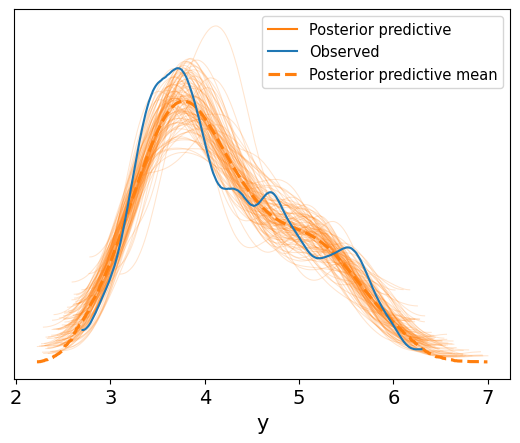

In [19]:
pm.sample_posterior_predictive(idata_penguins,model_penguins, extend_inferencedata=True)
az.plot_ppc(idata_penguins, num_pp_samples=100, colors=["C1", "C0", "C1"])

Output()

<Axes: xlabel='y'>

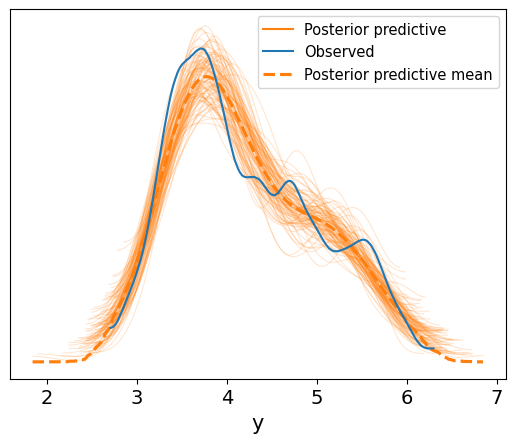

In [22]:
pm.sample_posterior_predictive(idata_penguinsN,model_penguinsN, extend_inferencedata=True)
az.plot_ppc(idata_penguinsN, num_pp_samples=100, colors=["C1", "C0", "C1"])

The normal doesn't seem to do much better than the gamma distribution. Honestly, all of the difference here looks like it's caused by the model simply sampling differently.

**Task7**:

Plot flipper length versus body mass,

and then plot the posterior predictve from the model over the data.
You're going to copy paste the plotting code from the notes, fyi.

/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


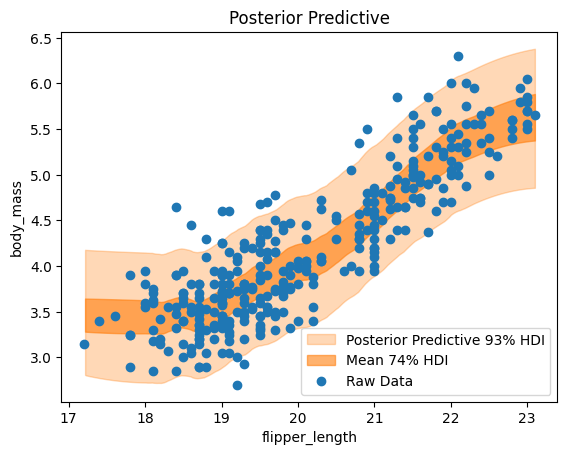

In [20]:
posterior_mean = idata_penguins.posterior["μ"]

μ_hdi = az.hdi(ary=idata_penguins, group="posterior", var_names=["μ"], hdi_prob=0.74)

pps = az.extract(idata_penguins, group="posterior_predictive", var_names=["y"]).T

idx = np.argsort(X[:, 0])
fig, ax = plt.subplots()

az.plot_hdi(
    x=X[:, 0],
    y=pps,
    ax=ax,
    hdi_prob=0.93,
    fill_kwargs={"alpha": 0.3, "label": r"Posterior Predictive 93% HDI"},
)

az.plot_hdi(
    x=X[:, 0],
    y=posterior_mean,
    ax=ax,
    hdi_prob=0.74,
    fill_kwargs={"alpha": 0.6, "label": r"Mean 74% HDI"},
)
ax.plot(penguins["flipper_length"], penguins["body_mass"], "o", c="C0", label="Raw Data")
ax.legend(loc="lower right")
ax.set(
    title="Posterior Predictive",
    xlabel="flipper_length",
    ylabel="body_mass",
);

**Task8**:

Interpret the plot above in context. Do you think it captures the true association between flipper length and body mass in penguins? Why or why not? Make sure to reference specific things you see in the plot.

I do think it captures the association fairly well. At the start, the data does seem to suggest that flipper small flipper lengths correlate to low body mass, but the slight lack of data leads to the straight line seen in the graph, which isn't entirely accurate. The same problem seems to appear at the end of the plot, where there's less data than in the middle. Other than the extremes, though, the majority of the plot does seem to fit the relationship between flipper length and body mass. There is a definite upward trend between them, and the model captures that.

**Task9**:

Create partial depnedence plots (pdps), individual conditional expectation (ice) plots, and a variable importance plot for the BARTpenguin model.

array([<Axes: xlabel='X_0'>, <Axes: xlabel='X_1'>, <Axes: xlabel='X_2'>],
      dtype=object)

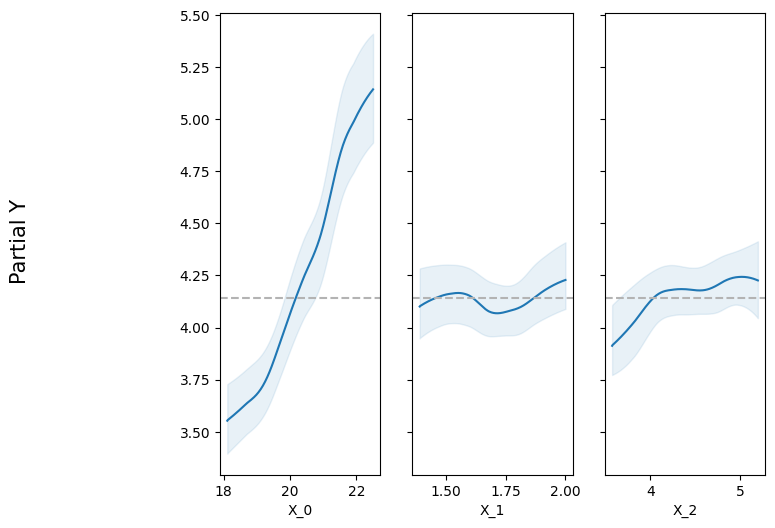

In [23]:
pmb.plot_pdp(μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))

array([<Axes: xlabel='X_0'>, <Axes: xlabel='X_1'>, <Axes: xlabel='X_2'>],
      dtype=object)

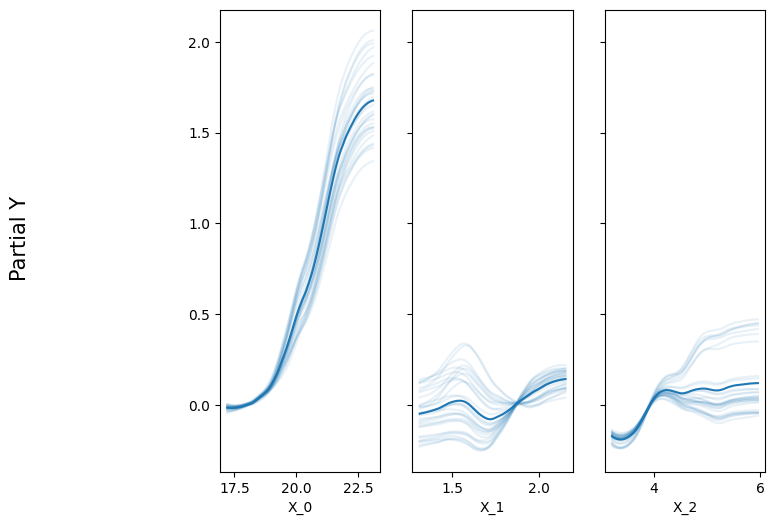

In [24]:
pmb.plot_ice( μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))


<Axes: ylabel='R²'>

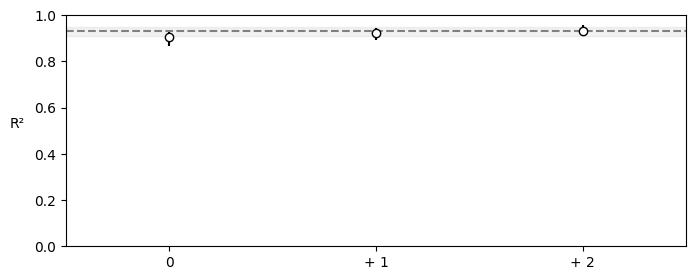

In [26]:
vi_penguins = pmb.compute_variable_importance(idata_penguins, μ_, X)
pmb.plot_variable_importance(vi_penguins)

**Task10**:

Using the above plots, make an argument about which variable(s) is/are most important in predicting body mass in penguins.

What is the relationship for each variable to body mass, when you take the other variables into account?

Is that relationship complicated by interactions between variables? How do you know?

Make sure to reference specific things you see in each plot, to justify your decisions and comments.

Low bill depth seems to indicate low body mass, but once you start getting into higher bill depth, the model doesn't seem to know much. Bill depth and bill length have very little impact on the final model, it seems, compared to flipper length. In the VI plot, flipper length has the biggest difference, whereas bill length and bill depth are practically on the line. On the ICE and PDP plots, flipper length is the only plot that has a real slope. Bill length and depth on the PDP have a slight upward curve, but compared to flipper length on the same graph, they have practically no slope. It doesn't seem like the relationships are complicated much or at all by interactions between variables, because the ICE and PDP models look incredibly similar, even though ICE takes possible interactions into account. This makes sense, too, if you think about a possible causal diagram. Flipper length would have no business influencing how long or deep the bill is, and vice versa.

This means that flipper length has the most clear relationship to body mass, and you can likely drop the other two variables with little to no trouble to the final BART model.